In [1]:
#Step 1 Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
# Step 2 Upload the Excel file (students pick from local drive)
uploaded = files.upload()  # choose your .xlsx
file_name = list(uploaded.keys())[0]

# Step 3 Read the sheet with replicates (Sheet2)
# If your sheet name differs, change 'Sheet2' or use sheet index (e.g., sheet_name=1)
df = pd.read_excel(file_name, sheet_name='Sheet1')

Saving Exercise 2.xlsx to Exercise 2.xlsx


In [13]:
#  Step 4: Show the first few rows
print(df.head())

   Time (Hours)  Molecule A1  Molecule A2  Molecule A3  Molecule B1  \
0             0   103.943936   115.448803   107.127328    90.607703   
1             4   106.927459   129.384281   127.863836   101.489787   
2             8   180.764015   153.835569   175.114521   115.193249   
3            12   270.151550   258.685728   259.930339   123.615196   
4            16   328.041422   352.923463   430.681180   178.102825   

   Molecule B2  Molecule B3  
0    62.619445    92.503303  
1    86.976959    86.580267  
2   100.702744   100.817420  
3   124.024084   147.005757  
4   169.495632   170.918072  


In [14]:
# Step 5 Tidy to long format and compute mean ± SEM per strain & time ===
time_col = df.columns[0]                       # first column (e.g., 'Hours')
value_cols = df.columns[1:]                    # replicate columns

long_df = df.melt(id_vars=[time_col],
                  value_vars=value_cols,
                  var_name='StrainRep',
                  value_name='OD')

# Remove trailing replicate number to get the base strain name (e.g., "WT 1" -> "WT")
long_df['Strain'] = long_df['StrainRep'].str.replace(r'\s*\d+$', '', regex=True)

# mean and SEM = std/sqrt(n) for each time × strain
summary = (long_df
           .groupby([time_col, 'Strain'], as_index=False)
           .agg(mean=('OD', 'mean'),
                sem =('OD', lambda x: x.std(ddof=1) / np.sqrt(len(x)))))

print("Summary (first rows):\n", summary.head(), "\n")

Summary (first rows):
    Time (Hours)      Strain        mean       sem
0             0  Molecule A  108.840022  3.429795
1             0  Molecule B   81.910151  9.660863
2             4  Molecule A  121.391859  7.245506
3             4  Molecule B   91.682338  4.905062
4             8  Molecule A  169.904702  8.198414 



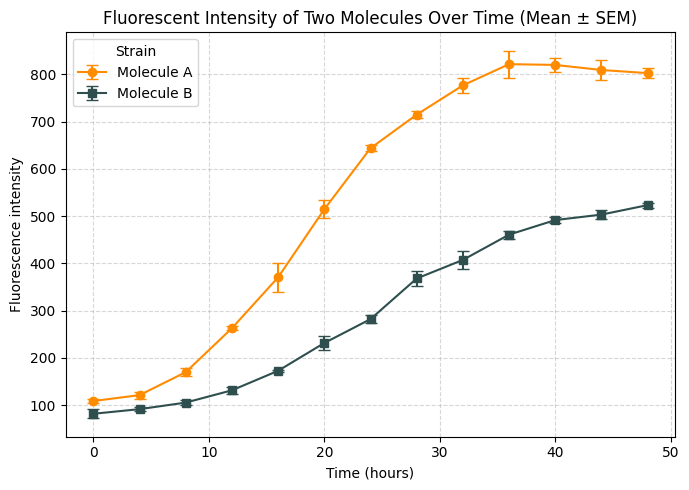

In [18]:
# === 4) Plot mean curves with SEM error bars ===
plt.figure(figsize=(7,5))

# Molecule A:
plt.errorbar(summary[summary['Strain']=='Molecule A'][time_col],
             summary[summary['Strain']=='Molecule A']['mean'],
             yerr=summary[summary['Strain']=='Molecule A']['sem'],
             fmt='-o', capsize=4, color='#FF8C00', label='Molecule A') # DarkOrange

# Molecule B:
plt.errorbar(summary[summary['Strain']=='Molecule B'][time_col],
             summary[summary['Strain']=='Molecule B']['mean'],
             yerr=summary[summary['Strain']=='Molecule B']['sem'],
             fmt='-s', capsize=4, color='#2F4F4F', label='Molecule B') # DarkSlateGray

plt.xlabel("Time (hours)")
plt.ylabel("Fluorescence intensity")
plt.title("Fluorescent Intensity of Two Molecules Over Time (Mean ± SEM)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Strain")
plt.tight_layout()
png_path = 'Line plot.png'
pdf_path = 'Line plot.pdf'
plt.savefig(png_path, dpi=600)
plt.savefig(pdf_path)
plt.show()

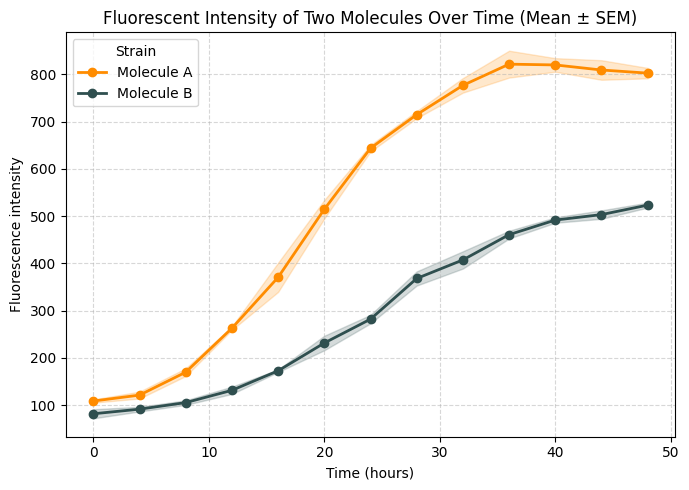

In [17]:
# === Step 6: Plot mean curves with SEM shading and custom colors ===
plt.figure(figsize=(7,5))

# Define colors for each strain
color_map = {
    'Molecule A': '#FF8C00', # DarkOrange
    'Molecule B': '#2F4F4F', # DarkSlateGray
       # handles alternate delta symbol
}

for strain, sub in summary.groupby('Strain'):
    sub = sub.sort_values(time_col)
    x = sub[time_col].values
    y = sub['mean'].values
    e = sub['sem'].values

    # Pick color (default gray if strain not in color_map)
    color = color_map.get(strain, 'gray')

    # Plot line + markers
    plt.plot(x, y, marker='o', label=strain, color=color, linewidth=2)

    # SEM shading
    plt.fill_between(x, y - e, y + e, alpha=0.2, color=color)

plt.xlabel("Time (hours)")
plt.ylabel("Fluorescence intensity")
plt.title("Fluorescent Intensity of Two Molecules Over Time (Mean ± SEM)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Strain")
plt.tight_layout()
png_path = 'Line plot.png'
pdf_path = 'Line plot.pdf'
plt.savefig(png_path, dpi=600)
plt.savefig(pdf_path)
plt.show()
plt.show()